In [ ]:
#@title Imports
# Pandas; Data manipulation
import pandas as pd
import numpy as np

# Matplotlib and Seaborn; Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

---
# Exploratory Data Analysis on Speed Dating Data Set
The dataset we study in this notebook was compiled by Ray Fisman and Sheena Iyengar for their 2006 paper "Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment"[1]. It consists of data collected from a speed dating experiment conducted between 2002 and 2004. The dataset includes information on 21 demographic variables for each participant, such as age, race, education level, religion, and occupation.

During the experiment, participants had four-minute speed dates with other participants of the opposite sex and rated each other based on their level of romantic interest. The dataset includes the ratings given by each participant to each of their dates, as well as the final decision of whether they would like to see their date again or not.

The dataset contains data from 552 participants, with roughly equal numbers of men and women. It has been used in various studies to analsze the factors that influence initial attraction and mate selection, including the role of physical attractiveness, socioeconomic status, and cultural and religious background. For a full key see this [link](https://github.com/warwickdatasciencesociety/Heartcoding-Hackathon-Event/blob/main/Hackathon%20Dataset%20Key.pdf).

The report is divided into three main sections. Firstly, we examine whether the reasons why participants chose to take part in the experiment influenced their likelihood of receiving matches. Secondly, we investigate whether there is a discrepancy between what people state as important qualities in a potential date versus the factors that actually determine match decisions. Finally, we analyse whether participants tend to overestimate or underestimate the ratings they receive from others.

[1]Fisman, Raymond, et al. "Gender differences in mate selection: Evidence from a speed dating experiment." The Quarterly Journal of Economics 121.2 (2006): 673-697. 

---


In [ ]:
dataset_link = "https://raw.githubusercontent.com/warwickdatasciencesociety/Heartcoding-Hackathon-Event/main/Hackathon%20Dataset.csv"

# Import dataset directly from github
df_raw = pd.read_csv(dataset_link, encoding = "utf-8")

# Read the top 5 lines of the dataframe
df_raw.head(5)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,4.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,3.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,10.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,5.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,7.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


## Part I: What drives match success?

In this section, our objective is to explore whether the motivations behind participants taking part in the study (seemed like a fun night out, to meet new people, to get a date, looking for a serious relationship, to say I did it or other) are associated with the likelihood of being matched with their dates. To begin, we will create a suitable data frame with relevant columns.

In [ ]:
#copy raw data frame and pick columns to include
df_filtered = df_raw.copy()

wave = df_filtered['wave']
int_corr = df_filtered['int_corr']
matched = df_filtered['match']
iid = df_filtered['iid']
pid = df_filtered['pid']

Goal = df_filtered['goal']
Date = df_filtered['date']
Go_Out = df_filtered['go_out']
Dec = df_filtered['dec']
P_Dec = df_filtered['dec_o']

d = { 
     "Wave": wave,
     "Interest_Correlation": int_corr,
     "Matched": matched,
     "Goal": Goal,
     "Date": Date,
     "Go Out": Go_Out,
     "Own iid": iid,
     "Partners iid": pid,
     "Decision": Dec,
     "Partners Decision": P_Dec
} 

# Create new dataframe from data
df = pd.DataFrame(data = d)

#append column that holds the date's goal
id_to_goal = dict(zip(df_filtered['iid'],df_filtered['goal']))
df['Partner Goal'] = df['Partners iid'].map(id_to_goal) ### mapping partner iid to partners goal

df.head()


,Wave,Interest_Correlation,Matched,Goal,Date,Go Out,Own iid,Partners iid,Decision,Partners Decision,Partner Goal
0,1.0,0.14,0.0,2.0,7.0,1.0,1.0,11.0,1.0,0.0,1.0
1,1.0,0.54,0.0,2.0,7.0,1.0,1.0,12.0,1.0,0.0,1.0
2,1.0,0.16,1.0,2.0,7.0,1.0,1.0,13.0,1.0,1.0,2.0
3,1.0,0.61,1.0,2.0,7.0,1.0,1.0,14.0,1.0,1.0,2.0
4,1.0,0.21,1.0,2.0,7.0,1.0,1.0,15.0,1.0,1.0,1.0


We now remove rows containing NaN values to further process the data.

In [ ]:
# group by wave and count the number of rows
nan_df = df[df.isna().any(axis=1)].groupby('Wave')
nan_count = nan_df['Wave'].count()
nan_df.head(5)

,Wave,Interest_Correlation,Matched,Goal,Date,Go Out,Own iid,Partners iid,Decision,Partners Decision,Partner Goal
312,2.0,NaN,0.0,NaN,NaN,NaN,28.0,40.0,0.0,0.0,2.0
313,2.0,NaN,0.0,NaN,NaN,NaN,28.0,41.0,0.0,1.0,2.0
314,2.0,NaN,0.0,NaN,NaN,NaN,28.0,42.0,0.0,1.0,2.0
315,2.0,NaN,0.0,NaN,NaN,NaN,28.0,43.0,0.0,0.0,6.0
316,2.0,NaN,0.0,NaN,NaN,NaN,28.0,44.0,0.0,1.0,1.0
828,3.0,NaN,0.0,NaN,NaN,NaN,58.0,66.0,0.0,1.0,2.0
829,3.0,NaN,0.0,NaN,NaN,NaN,58.0,67.0,1.0,0.0,6.0
830,3.0,NaN,0.0,NaN,NaN,NaN,58.0,68.0,1.0,0.0,5.0
831,3.0,NaN,0.0,NaN,NaN,NaN,58.0,69.0,1.0,0.0,6.0
832,3.0,NaN,0.0,NaN,NaN,NaN,58.0,70.0,0.0,0.0,5.0


In [ ]:
print("A count in which wave the NaN values occured: \n")
print(nan_count, "\n")
print("Before shaving", len(df))
df.dropna(axis = 0, inplace = True)

print("Rows after removing NA rows = ", len(df))

A count in which wave the NaN values occured: 

Wave
2.0     32
3.0     40
5.0     10
6.0     10
13.0    40
14.0    36
15.0    18
Name: Wave, dtype: int64 

Before shaving 8379
Rows after removing NA rows =  8192


We have removed 187 rows from our dataset, which accounts for roughly 4.5% of the total data. After examining the rows with missing values and identifying the waves in which they occur, it appears that the missing values are likely due to single individuals failing to complete their forms accurately or due to errors in data entry. We have determined that dropping these rows does not introduce any bias to our data.

Our next goal is to examine the distribution of participants' objectives for taking part in the experiment, as well as their self-reported frequencies of going on dates and going out in general.

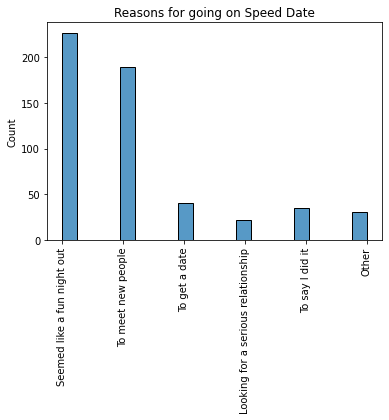

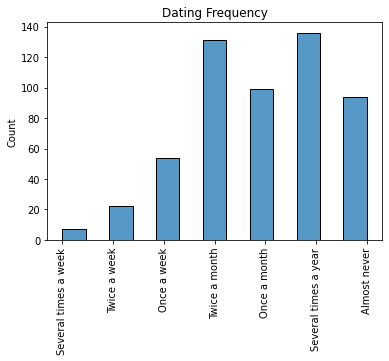

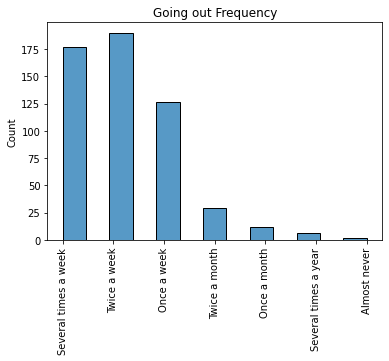

In [ ]:
#create new data frame containing only one row for each participant
df_ind = df.copy()
df_ind.drop_duplicates(subset='Own iid', keep='first', inplace=True)
df_ind.reset_index(drop=True, inplace=True)

#create the histograms
ax = sns.histplot(df_ind['Goal'])
ax.set_xlabel('')
ax.set_xticklabels(['0', 'Seemed like a fun night out', 'To meet new people', 'To get a date', 'Looking for a serious relationship', 'To say I did it', 'Other'])
plt.title("Reasons for going on Speed Date")
plt.xticks(rotation=90)
plt.show()

ax = sns.histplot(df_ind['Date'])
ax.set_xlabel('')
ax.set_xticklabels(['0', 'Several times a week', 'Twice a week', 'Once a week', 'Twice a month', 'Once a month', 'Several times a year', 'Almost never'])
plt.title("Dating Frequency")
plt.xticks(rotation=90)
plt.show()

ax = sns.histplot(df_ind['Go Out'])
ax.set_xlabel('')
ax.set_xticklabels(['0', 'Several times a week', 'Twice a week', 'Once a week', 'Twice a month', 'Once a month', 'Several times a year', 'Almost never'])
plt.title("Going out Frequency")
plt.xticks(rotation=90)
plt.show()

Based on our observations, it appears that the majority of participants are primarily interested in the speed dating event as a means of having fun or meeting new people, rather than finding a serious relationship. Additionally, most people do not go on dates frequently, but do go out socially quite often.

To further explore the relationship between dating success and reasons for participation, we have filtered the data by each of the six reasons for participating and plotted the proportion of matches in a stacked bar chart.

Here is the key for the different goals:

| key  |  value |
|---|---|
|  1 | Seemed like a fun night out  |
|  2 |  To meet new people |
| 3  |  To get a date |
|  4 |  Looking for a serious relationship |
|  5 |  To say I did it |
|  6 |  Other  |


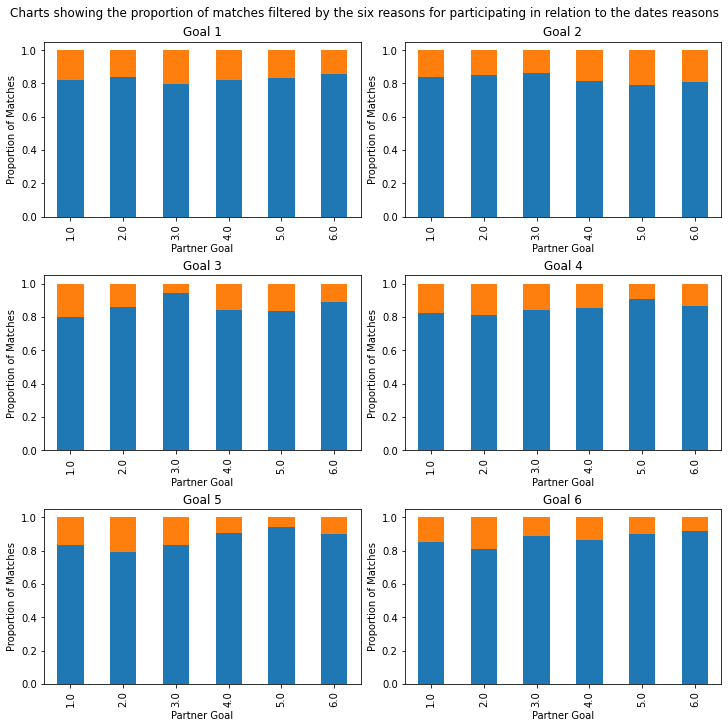

In [ ]:
#
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), constrained_layout=True)
for n in range(1, 7):
  #set up new temporary data frame and only consider those rows with goal n
  df_spec_goal = df.copy()
  df_spec_goal = df_spec_goal.drop(df.loc[df.Goal != n].index)
  df_spec_goal.reset_index(drop=True, inplace=True)
  table=pd.crosstab(df_spec_goal['Partner Goal'], df_spec_goal['Matched'])
  table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes[round(np.floor((n-1)/2)),(n-1)%2])

  axes[round(np.floor((n-1)/2)),(n-1)%2].set_title(f'Goal {n}')
  axes[round(np.floor((n-1)/2)),(n-1)%2].set_xlabel('Partner Goal')
  axes[round(np.floor((n-1)/2)),(n-1)%2].set_ylabel('Proportion of Matches')
  axes[round(np.floor((n-1)/2)),(n-1)%2].get_legend().remove()

fig.suptitle('Charts showing the proportion of matches filtered by the six reasons for participating in relation to the dates reasons')
plt.show()

The majority of the charts show a balanced distribution, except for a few notable cases. It is worth mentioning that individuals who are actively seeking a date (goal 3) are unlikely to match with each other, possibly because of being more selective than those seeking casual fun. This is evidenced by the high matching rate for individuals with goal 1 across all plots. Another noteworthy observation is that individuals who are solely participating for the sake of it (goal 5) are unlikely to match, which could be attributed to their lack of interest in building relationships.

Moving forward, we aim to compare a person's decision to their partner's goal, instead of the match outcome, to understand how likely someone is to match based on their own goal.

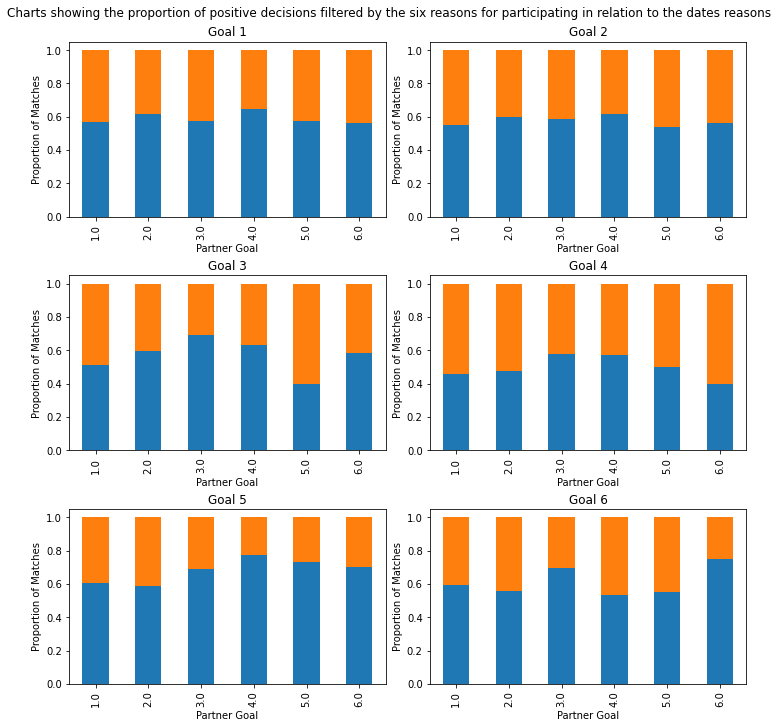

In [ ]:
#
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), constrained_layout=True)
for n in range(1, 7):
  #set up new temporary data frame and only consider those rows with goal n
  df_spec_goal = df.copy()
  df_spec_goal = df_spec_goal.drop(df.loc[df.Goal != n].index)
  df_spec_goal.reset_index(drop=True, inplace=True)
  table=pd.crosstab(df_spec_goal['Partner Goal'], df_spec_goal['Decision'])
  table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes[round(np.floor((n-1)/2)),(n-1)%2])

  axes[round(np.floor((n-1)/2)),(n-1)%2].set_title(f'Goal {n}')
  axes[round(np.floor((n-1)/2)),(n-1)%2].set_xlabel('Partner Goal')
  axes[round(np.floor((n-1)/2)),(n-1)%2].set_ylabel('Proportion of Matches')
  axes[round(np.floor((n-1)/2)),(n-1)%2].get_legend().remove()

fig.suptitle('Charts showing the proportion of positive decisions filtered by the six reasons for participating in relation to the dates reasons')
plt.show()

We can observe similar patterns as before.

Next, we investigate whether the correlation between a participant's and their partner's rating of interests is a reliable indicator of whether the date resulted in a match.

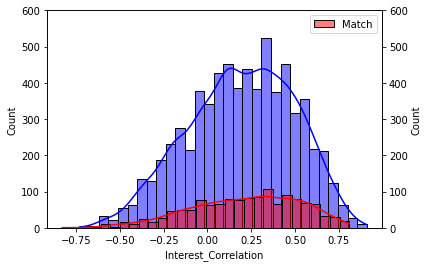

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

# Histogram for successful matches
g = sns.histplot(
    x = df[df['Matched'] == 0]["Interest_Correlation"],
    bins = 30,
    label = 'No Match',
    color = 'b',
    ax = ax,
    kde = True
)

# Histogram for unsuccessful matches
f = sns.histplot(
    x = df[df['Matched'] == 1]["Interest_Correlation"],
    bins = 30,
    color = 'r',
    label = 'Match',
    ax = ax2,
    kde = True
)

# Set size of y axis on (0, 600)
ax.set(ylim=(0, 600))
ax2.set(ylim=(0, 600))
plt.legend()
plt.show()

Upon visual inspection, the distributions appear to have comparable means and variances. To validate this observation, we compute the mean and standard deviation of the correlation for subsets of rows with and without matches.

In [ ]:
#Clone data frame and populate with chosen columns
df_filtered = df_raw.copy()

int_corr = df_filtered['int_corr']
matched = df_filtered['match']


d = { 
     "Interest_Correlation": int_corr,
     "Matched": matched,
     
} 

#Create new dataframe from data
df_mean = pd.DataFrame(data = d)

#Calculate means and variances
mean_no_match = df.loc[df.Matched == 0]['Interest_Correlation'].mean()
std_no_match = df.loc[df.Matched == 0]['Interest_Correlation'].std()
mean_match = df.loc[df.Matched == 1]['Interest_Correlation'].mean()
std_match = df.loc[df.Matched == 1]['Interest_Correlation'].std()

print(f'The dates that resulted in a match have an average correlation of {mean_match} and a standard deviation of {std_match}.')
print(f'The dates that did not result in a match have an average correlation of {mean_no_match} and a standard deviation of {std_no_match}.')

The dates that resulted in a match have an average correlation of 0.21721275018532243 and a standard deviation of 0.3070841618328567.
The dates that did not result in a match have an average correlation of 0.1922066345170247 and a standard deviation of 0.30283853452234055.


Our hypothesis that the average correlation between the participant's and partner's rating of interests could be a good estimator for the date resulting in a match has been disproved. After calculating the mean and standard deviation of correlation for the subsets of rows with and without matches, it is apparent that there is no relationship between the average correlation and the match outcome of a date. Therefore, the correlation is not an effective estimator for matches.

## Part II: Do people know what they value?

Before their dates, participants were asked to rank the importance of several attributes, including attractiveness, sincerity, intelligence, fun, ambitiousness, and shared hobbies or interests. We will first analyze how people answered and then determine if their responses match the actual matching decisions made during the experiment.

In [ ]:
#copy raw data frame and reduce to one row per participant
df_filtered = df_raw.copy()
df_filtered.drop_duplicates(subset='iid', keep='first', inplace=True)
df_filtered.reset_index(drop=True, inplace=True)

#choose columns of rankings of charactersistics
d = {
    "Gender": df_filtered["gender"],
    "Wave": df_filtered["wave"],
    "Attractiveness": df_filtered["attr1_1"],
    "Sincerity": df_filtered["sinc1_1"],
    "Intelligence": df_filtered["intel1_1"],
    "Ambition": df_filtered["amb1_1"],
    "Fun": df_filtered["fun1_1"],
    "Sharded Interest": df_filtered["shar1_1"]
}
df = pd.DataFrame(data = d)

#normalise the rows in waves between 6 and 9 to the same format as other waves
normalize_cols = lambda cols: cols[0:2].tolist() + (cols[2:] / cols[2:].sum() * 100).tolist()
df.loc[(df["Wave"]>=6) & (df["Wave"]<=9)] = df.loc[(df["Wave"]>=6) & (df["Wave"]<=9)].apply(normalize_cols, axis=1, result_type='broadcast')


Briefly note that due to the difference in scoring system in waves 6 to 9 (ranking independently on a scale of 1-10 instead of points summing up to 100), we had to rescale the data. To accomplish this, we divided each value by the row sum and multiplied by 100, which gave us a uniform format for the data.


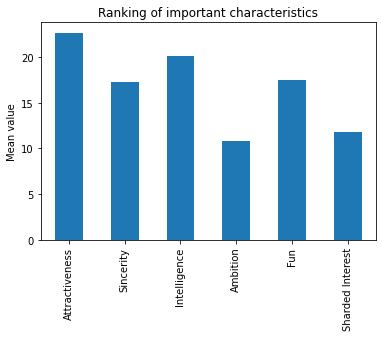

In [ ]:
#plot bar chart of column means
df.iloc[:,2:].mean().plot.bar()
plt.title("Ranking of important characteristics")
plt.ylabel("Mean value")
plt.show()

The results show that attractiveness is the most important factor for dating decisions, followed closely by intelligence and fun, while ambition and shared interests seem to have less influence.

Now want to test if the five first ranking factors are indeed the drivers in the order people have answered behind the decision making. For that, for each date we set in relation the ranking of the five attributes a participant has made and the resuting decision. We plot the results in a stacked bar chart.

In [ ]:
#set up new data frame with respective columns
df_filtered = df_raw.copy()

mat = df_filtered['match']
dec = df_filtered['dec']
gen = df_filtered['gender']
attr = np.round(df_filtered['attr'])
sinc = np.round(df_filtered['sinc'])
intel = np.round(df_filtered['intel'])
fun = np.round(df_filtered['fun'])
amb = np.round(df_filtered['amb'])

d = { 
     "Match": mat,
     "Decision": dec,
     "Gender": gen,
     "Attraction": attr, 
     "Sincerity": sinc,
     "Intelligence": intel,
     "Fun": fun,
     "Ambition": amb
     } 

df = pd.DataFrame(data = d)


In [ ]:
#Drop columns with NaN values
print("Before shaving", len(df))
df.dropna(axis = 0, inplace = True)

print("Rows after removing NA rows = ", len(df))

Before shaving 8379
Rows after removing NA rows =  7561


We justify the decision to drop rows similarly to above.

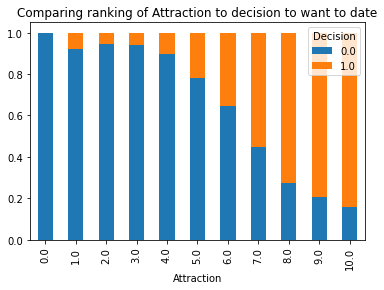

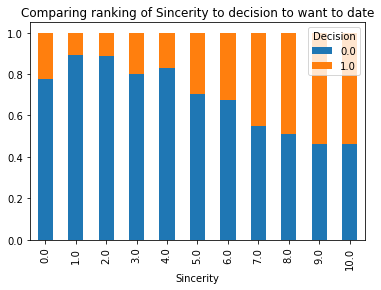

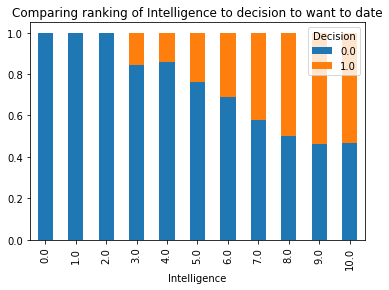

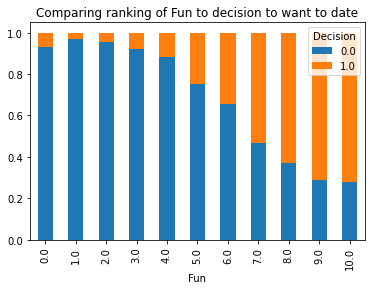

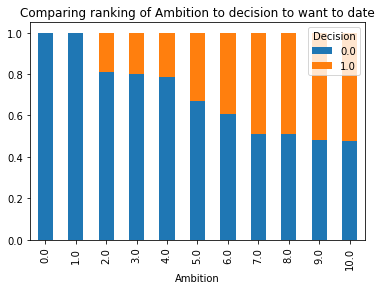

In [ ]:
table=pd.crosstab(df['Attraction'], df['Decision'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Comparing ranking of Attraction to decision to want to date")
plt.show()
table=pd.crosstab(df['Sincerity'], df['Decision'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Comparing ranking of Sincerity to decision to want to date")
plt.show()
table=pd.crosstab(df['Intelligence'], df['Decision'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Comparing ranking of Intelligence to decision to want to date")
plt.show()
table=pd.crosstab(df['Fun'], df['Decision'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Comparing ranking of Fun to decision to want to date")
plt.show()
table=pd.crosstab(df['Ambition'], df['Decision'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Comparing ranking of Ambition to decision to want to date")
plt.show()

As anticipated, high ratings for attractiveness and fun have a significant impact on the decision outcome, while high intelligence seems to be less important than people indicated beforehand. On the other hand, low scores in ambition, intelligence, and attractiveness are considered deal-breakers, and scores of 0 result in no positive decisions. Low scores for sincerity and fun do not appear to be exclusionary.

Now instead do a gender breakdown of this observation.

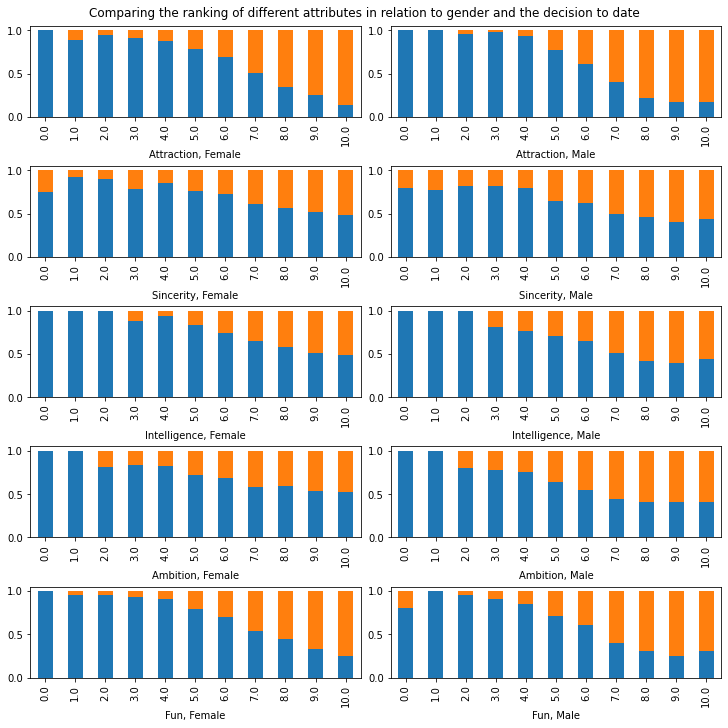

In [ ]:
#create stacked bar charts of split by gender
str = ["Attraction", "Sincerity", "Intelligence", "Ambition", "Fun"]
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 10), constrained_layout=True)
#fig.tight_layout()
for i, s in enumerate(str):
  table=pd.crosstab(df.loc[df["Gender"] == 0][s], df.loc[df["Gender"] == 0]['Decision'])
  table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes[i,0])
  axes[i,0].set_xlabel(f'{s}, Female')
  axes[i,0].get_legend().remove()

  table=pd.crosstab(df.loc[df["Gender"] == 1][s], df.loc[df["Gender"] == 1]['Decision'])
  table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes[i,1])
  axes[i,1].set_xlabel(f'{s}, Male')
  axes[i,1].get_legend().remove()
fig.suptitle('Comparing the ranking of different attributes in relation to gender and the decision to date')
plt.show()

Both genders value attraction and fun as the most significant attributes, and no discernible patterns appear to differentiate them.

## Part III: Can people realistically estimate their impression on others?

In this section we first see if there is a difference in how people rate themselves versus how they think ther people would rate them. We then go on to investigate the difference in thought and actual perception. 

In [ ]:
#copy raw data frame and reduce to one row per participant
df_filtered = df_raw.copy()
df_filtered.drop_duplicates(subset='iid', keep='first', inplace=True)
df_filtered.reset_index(drop=True, inplace=True)

#choose columns of differences between people perceive themselves vs how they think others perceive them
gender = df_filtered['gender']
attr_diff = df_filtered['attr3_1'] - df_filtered['attr5_1']
sinc_diff = df_filtered['sinc3_1'] - df_filtered['sinc5_1']
intel_diff = df_filtered['intel3_1'] - df_filtered['intel5_1']
amb_diff = df_filtered['amb3_1'] - df_filtered['amb5_1']
fun_diff = df_filtered['fun3_1'] - df_filtered['fun5_1']

d = {
     "Gender": gender,
     "Attraction Difference": attr_diff, 
     "Sincerity Difference": sinc_diff,
     "Intelligence Difference": intel_diff,
     "Ambition Difference": amb_diff,
     "Fun Difference": fun_diff
} 

# Create new dataframe from data
df = pd.DataFrame(data = d)
df.head()

,Gender,Attraction Difference,Sincerity Difference,Intelligence Difference,Ambition Difference,Fun Difference
0,0.0,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#find number of rows with NaN values
print("Rows missing Attraction Difference: ", len(df.loc[df['Attraction Difference'].isnull()]))

#drop the NaN rows
print("Before shaving", len(df))
df.dropna(axis = 0, inplace = True)

print("Rows after removing NA rows = ", len(df))

Rows missing Attraction Difference:  238
Before shaving 552
Rows after removing NA rows =  314


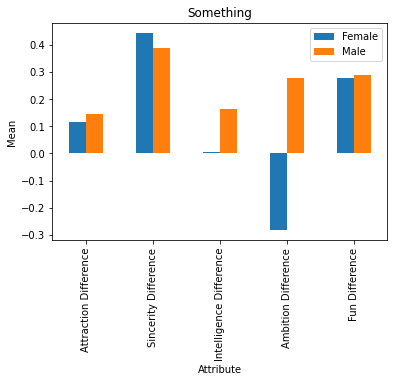

In [ ]:
#plot means of differences for male and female participents
plotdata = pd.DataFrame({
    "Female":[df.loc[df['Gender']==0].mean()[1], df.loc[df['Gender']==0].mean()[2], df.loc[df['Gender']==0].mean()[3], df.loc[df['Gender']==0].mean()[4], df.loc[df['Gender']==0].mean()[5]],
    "Male":[df.loc[df['Gender']==1].mean()[1], df.loc[df['Gender']==1].mean()[2], df.loc[df['Gender']==1].mean()[3], df.loc[df['Gender']==1].mean()[4], df.loc[df['Gender']==1].mean()[5]]
    }, 
    index=["Attraction Difference", "Sincerity Difference", "Intelligence Difference", "Ambition Difference", "Fun Difference"]
)
plotdata.plot(kind="bar")
plt.title("Something")
plt.xlabel("Attribute")
plt.ylabel("Mean")
plt.show()

It's worth noting that a positive value in the diagram above suggests that, on average, participants rated themselves higher than how they think they would be perceived by others in a certain attribute. Interestingly, attractiveness is viewed as the most objective characteristic, whereas participants tend to think their own sincerity and fun will be underestimated. Notably, women tend to believe that others will accurately perceive their intelligence, while men tend to think they come across as less intelligent. Perhaps the most surprising finding is that women tend to assume that their ambition will be overstimated, while men continue to follow the overall pattern.

Taking things a step further, we now investigate how accurately people rate their own characteristics by comparing their self-assessments to the average ratings they received from their dates.

In [ ]:
#copy raw data frame and reduce to one row per participant
df_filtered = df_raw.copy()
df_filtered.drop_duplicates(subset='iid', keep='first', inplace=True)
df_filtered.reset_index(drop=True, inplace=True)

#choose columns of how people think others perceive them
gender = df_filtered['gender']
attr_s = df_filtered['attr5_1']
sinc_s = df_filtered['sinc5_1']
intel_s = df_filtered['intel5_1']
amb_s = df_filtered['amb5_1']
fun_s = df_filtered['fun5_1']

#for each participant calculate the mean rating their date gave them
id_mean_attr_dict = df_raw.groupby('pid')['attr'].mean().to_dict()
attr_o = df_filtered['iid'].map(id_mean_attr_dict) 

id_mean_sinc_dict = df_raw.groupby('pid')['sinc'].mean().to_dict()
sinc_o = df_filtered['iid'].map(id_mean_sinc_dict) 

id_mean_intel_dict = df_raw.groupby('pid')['intel'].mean().to_dict()
intel_o = df_filtered['iid'].map(id_mean_intel_dict) 

id_mean_amb_dict = df_raw.groupby('pid')['amb'].mean().to_dict()
amb_o = df_filtered['iid'].map(id_mean_amb_dict) 

id_mean_fun_dict = df_raw.groupby('pid')['fun'].mean().to_dict()
fun_o = df_filtered['iid'].map(id_mean_fun_dict) 

d = {
     "Gender": gender,
     "Attractiveness Self": attr_s, 
     "Sincerity Self": sinc_s,
     "Intelligence Self": intel_s,
     "Ambition Self": amb_s,
     "Fun Self": fun_s,
     "Attractiveness Other": attr_o,
     "Sincerity Other": sinc_o,
     "Intelligence Other": intel_o,
     "Ambition Other": amb_o,
     "Fun Other": fun_o
} 

# Create new dataframe from data
df = pd.DataFrame(data = d)
df.head()

,Gender,Attractiveness Self,Sincerity Self,Intelligence Self,Ambition Self,Fun Self,Attractiveness Other,Sincerity Other,Intelligence Other,Ambition Other,Fun Other
0,0.0,NaN,NaN,NaN,NaN,NaN,6.7,7.4,8.0,8.000000,7.2
1,0.0,NaN,NaN,NaN,NaN,NaN,7.7,7.1,7.9,7.500000,7.5
2,0.0,NaN,NaN,NaN,NaN,NaN,6.5,7.1,7.3,7.111111,6.2
3,0.0,NaN,NaN,NaN,NaN,NaN,7.0,7.1,7.7,7.700000,7.5
4,0.0,NaN,NaN,NaN,NaN,NaN,5.3,7.7,7.6,7.800000,7.2


In [ ]:
#Calculate the number of rows containing NaN values
print("Rows missing Attractiveness Self: ", len(df.loc[df['Attractiveness Self'].isnull()]))
df.loc[df['Attractiveness Other'].isnull()].head()

#Drop NaN rows
print("Before shaving", len(df))
df.dropna(axis = 0, inplace = True)

print("Rows after removing NA rows = ", len(df))

Rows missing Attractiveness Self:  238
Before shaving 552
Rows after removing NA rows =  314


Again, we have to drop about 40% of our data due to non-existing values but this should not skew our data as is pure dependent on the wave the data is coming from and these are identically in experimental design.

We conducted a brief data sanity check on the calculations we performed. Our expectation is for the average rating of each participant to be distributed approximately normally. The resulting plots largely support this assumption.

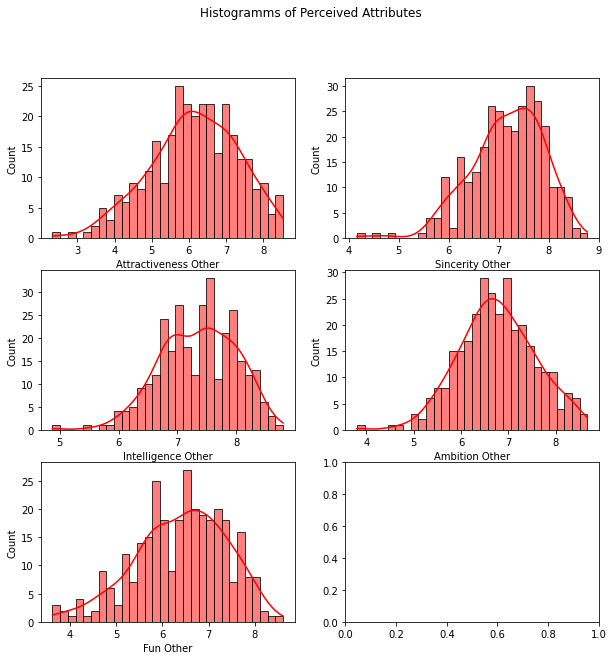

In [ ]:
#create histograms of average ratings for each characteristic
str = ["Attractiveness Other", "Sincerity Other", "Intelligence Other", "Ambition Other", "Fun Other"]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
for i, s in enumerate(str):
  axes[(round(np.floor(i/2)), i%2)] = sns.histplot(x = s, 
                    data = df,
                    bins = 30, # Number of bins to seperate data into. Try out different values!
                    kde = True, # If true, plot the corresponding scaled kde plot. Try to set it to True and see what happens.
                    color = 'r',
                    ax=axes[(round(np.floor(i/2)), i%2)]) # Set color to red.

  axes[(round(np.floor(i/2)), i%2)].set_xlabel(s)
fig.suptitle("Histogramms of Perceived Attributes")
plt.show()

We now calculate the differences between self-rating and the average ratings by date partners.

In [ ]:
#create new data frame that holds the difference of perceived charactersistics and actual ratings as well as the proportion of matches
d = {
    "Gender": df["Gender"],
    "Attractiveness Difference": df["Attractiveness Self"] - df["Attractiveness Other"],
    "Sincerity Difference": df["Sincerity Self"] - df["Sincerity Other"],
    "Intelligence Difference": df["Intelligence Self"] - df["Intelligence Other"],
    "Ambition Difference": df["Ambition Self"] - df["Ambition Other"],
    "Fun Difference": df["Fun Self"] - df["Fun Other"]
}

df_diff = pd.DataFrame(data = d)
df_diff.head()

,Gender,Attractiveness Difference,Sincerity Difference,Intelligence Difference,Ambition Difference,Fun Difference
232,0.0,3.111111,-1.888889,1.888889,2.714286,-0.750000
233,0.0,-1.888889,1.444444,2.000000,3.142857,1.555556
234,0.0,2.444444,2.111111,0.750000,3.142857,5.888889
235,0.0,2.666667,2.333333,1.555556,3.833333,1.111111
236,0.0,2.333333,1.444444,1.888889,1.875000,2.250000


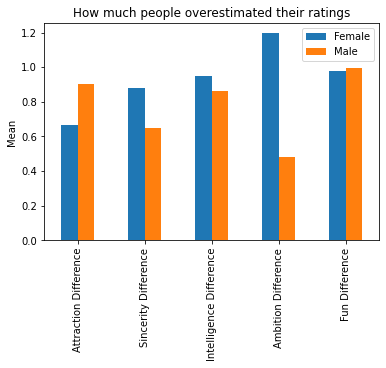

In [ ]:
#plot means of differences for male and female participents
plotdata = pd.DataFrame({
    "Female":[df_diff.loc[df['Gender']==0].mean()[1], df_diff.loc[df['Gender']==0].mean()[2], df_diff.loc[df['Gender']==0].mean()[3], df_diff.loc[df['Gender']==0].mean()[4], df_diff.loc[df['Gender']==0].mean()[5]],
    "Male":[df_diff.loc[df['Gender']==1].mean()[1], df_diff.loc[df['Gender']==1].mean()[2], df_diff.loc[df['Gender']==1].mean()[3], df_diff.loc[df['Gender']==1].mean()[4], df_diff.loc[df['Gender']==1].mean()[5]]
    }, 
    index=["Attraction Difference", "Sincerity Difference", "Intelligence Difference", "Ambition Difference", "Fun Difference"]
)
plotdata.plot(kind="bar")
plt.title("How much people overestimated their ratings")
plt.ylabel("Mean")
plt.show()

Our analysis reveales that both genders tend to overestimate the perception of their own attributes across the board. However, the degree of overestimation varies by gender. Men tend to overestimate their perceived attractiveness and fun to a greater extent than women, while women tend to overestimate their impression of their sincerity, intelligence, and ambition more than men. In particular, there is a significant gap between men and women in terms of perceived ambition.

Next, we aim to explore whether there is any correlation between being realistic about one's own attributes and the likelihood of receiving matches. Specifically, we will investigate whether the difference between participants' assumed perception and their actual perceived ratings is linked to their success in obtaining matches.

In [ ]:
#add a new column to the data frame holding the faction of dates resulting in a mathc for each participant
df_diff['perc_of_poss_matches'] = df_raw.groupby('iid')['match'].sum() / df_raw.groupby('iid')['iid'].count()
df_diff.head()


,Gender,Attractiveness Difference,Sincerity Difference,Intelligence Difference,Ambition Difference,Fun Difference,perc_of_poss_matches
232,0.0,3.111111,-1.888889,1.888889,2.714286,-0.750000,0.050000
233,0.0,-1.888889,1.444444,2.000000,3.142857,1.555556,0.250000
234,0.0,2.444444,2.111111,0.750000,3.142857,5.888889,0.000000
235,0.0,2.666667,2.333333,1.555556,3.833333,1.111111,0.222222
236,0.0,2.333333,1.444444,1.888889,1.875000,2.250000,0.000000


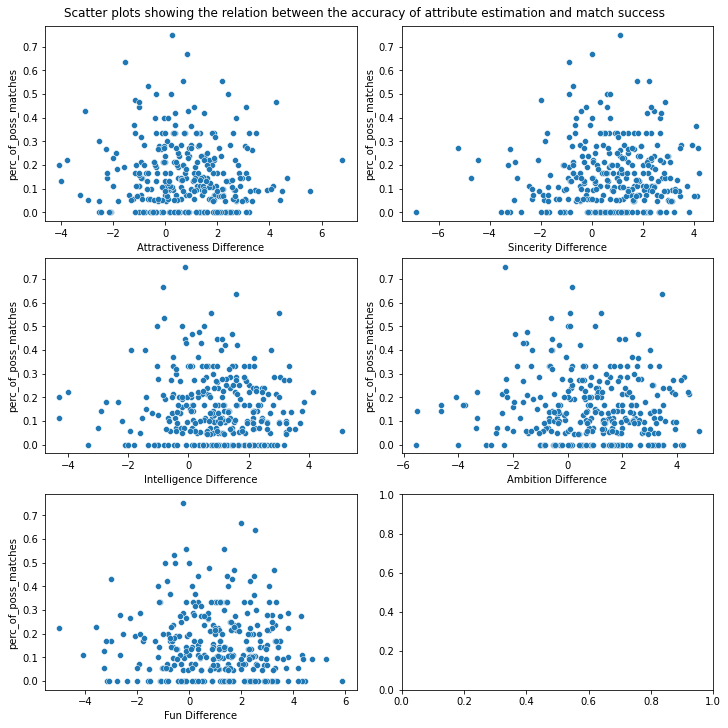

In [ ]:
str = ["Attractiveness Difference", "Sincerity Difference", "Intelligence Difference", "Ambition Difference", "Fun Difference"]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), constrained_layout=True)
for i, s in enumerate(str):
  axes[(round(np.floor(i/2)), i%2)] = sns.scatterplot(x=s, 
                                                      y='perc_of_poss_matches', 
                                                      data=df_diff,
                                                      ax=axes[(round(np.floor(i/2)), i%2)])

  axes[(round(np.floor(i/2)), i%2)].set_xlabel(s)
fig.suptitle("Scatter plots showing the relation between the accuracy of attribute estimation and match success")
plt.show()

It is pretty evident that there is not correlation between being accurate about the perception of any attribute and the proportion of dates that end in matches. This rules out being realistic about oneself as an estimator of dating success.